In [35]:
import pandas as pd
df = pd.read_csv("D:\Deep Learning\Deep Learning - Datasets\MNIST\mnist_784_csv.csv")

In [36]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [37]:
y=df['class']
x=df.drop(labels=['class'],axis=1)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
x_train.shape

(56000, 784)

In [40]:
x_test.shape

(14000, 784)

In [41]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)

In [42]:
x_train = x_train/255.0
x_test = x_test/255.0

In [43]:
from keras.models import Model
from keras.layers import Dense,Input
from keras import regularizers

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input_img,decoded)


In [44]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [45]:
autoencoder.fit(x_train,x_train,epochs=120,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/120
219/219 [==============================] - 2s 7ms/step - loss: 0.2876 - val_loss: 0.1988
Epoch 2/120
219/219 [==============================] - 1s 5ms/step - loss: 0.1800 - val_loss: 0.1648
Epoch 3/120
219/219 [==============================] - 1s 6ms/step - loss: 0.1551 - val_loss: 0.1466
Epoch 4/120
219/219 [==============================] - 1s 5ms/step - loss: 0.1404 - val_loss: 0.1349
Epoch 5/120
219/219 [==============================] - 1s 6ms/step - loss: 0.1306 - val_loss: 0.1267
Epoch 6/120
219/219 [==============================] - 1s 6ms/step - loss: 0.1236 - val_loss: 0.1208
Epoch 7/120
219/219 [==============================] - 1s 5ms/step - loss: 0.1184 - val_loss: 0.1164
Epoch 8/120
219/219 [==============================] - 1s 5ms/step - loss: 0.1146 - val_loss: 0.1131
Epoch 9/120
219/219 [==============================] - 1s 5ms/step - loss: 0.1117 - val_loss: 0.1106
Epoch 10/120
219/219 [==============================] - 1s 5ms/step - loss: 0.1097 - val_lo

219/219 [==============================] - 2s 7ms/step - loss: 0.0974 - val_loss: 0.0976
Epoch 82/120
219/219 [==============================] - 1s 6ms/step - loss: 0.0974 - val_loss: 0.0977
Epoch 83/120
219/219 [==============================] - 1s 6ms/step - loss: 0.0974 - val_loss: 0.0975
Epoch 84/120
219/219 [==============================] - 1s 5ms/step - loss: 0.0973 - val_loss: 0.0976
Epoch 85/120
219/219 [==============================] - 1s 6ms/step - loss: 0.0973 - val_loss: 0.0976
Epoch 86/120
219/219 [==============================] - 1s 6ms/step - loss: 0.0973 - val_loss: 0.0976
Epoch 87/120
219/219 [==============================] - 1s 6ms/step - loss: 0.0972 - val_loss: 0.0974
Epoch 88/120
219/219 [==============================] - 1s 6ms/step - loss: 0.0972 - val_loss: 0.0975
Epoch 89/120
219/219 [==============================] - 1s 6ms/step - loss: 0.0972 - val_loss: 0.0974
Epoch 90/120
219/219 [==============================] - 1s 6ms/step - loss: 0.0972 - val_loss: 

In [46]:
predicted = autoencoder.predict(x_test)

438/438 [==============================] - 1s 2ms/step


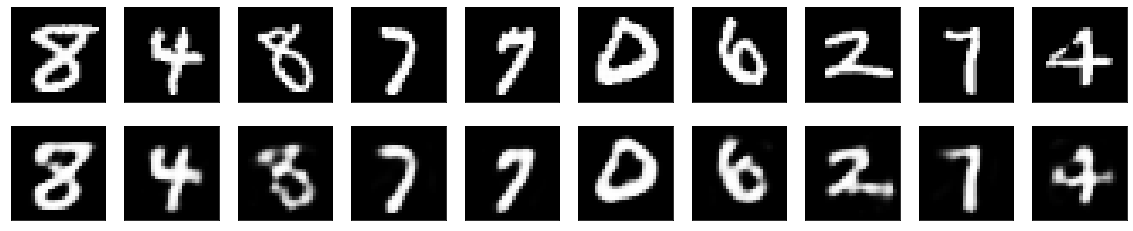

In [47]:
import matplotlib.pyplot as plt
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()